# **Electric Vehicles Market Size Analysis**

Market size analysis for electric vehicles involves a multi-step process that includes defining the market scope, collecting and preparing data, analytical modelling, and communicating findings through visualization and reporting

# Import Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [2]:
EV_Market_data= pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')

# Explore Dataset

In [3]:
EV_Market_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579.0,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107.0,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144.0,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011.0,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552.0,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [4]:
# Display summary statistics
EV_Market_data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,4372.000000,4372.000000,4372.000000,4372.000000,4371.000000,4.371000e+03,4.371000e+03
mean,98185.610018,2020.481244,62.090576,950.786825,33.293297,2.213921e+08,5.303403e+10
std,233.680417,2.940245,93.627650,7516.410991,14.388974,7.804353e+07,1.266051e+07
min,98001.000000,2011.000000,0.000000,0.000000,1.000000,1.861330e+05,5.300796e+10
25%,98033.000000,2019.000000,0.000000,0.000000,22.000000,1.813640e+08,5.303301e+10
50%,98103.000000,2022.000000,0.000000,0.000000,41.000000,2.275394e+08,5.303302e+10
75%,98188.000000,2023.000000,84.000000,0.000000,45.000000,2.549932e+08,5.303303e+10
max,99362.000000,2024.000000,330.000000,102000.000000,49.000000,4.788800e+08,5.307794e+10


In [5]:
# Display information  about dataset
EV_Market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         4372 non-null   object 
 1   County                                             4372 non-null   object 
 2   City                                               4372 non-null   object 
 3   State                                              4372 non-null   object 
 4   Postal Code                                        4372 non-null   int64  
 5   Model Year                                         4372 non-null   int64  
 6   Make                                               4372 non-null   object 
 7   Model                                              4372 non-null   object 
 8   Electric Vehicle Type                              4372 non-null   object 
 9   Clean Al

In [7]:
# Clean the data
# check for missing values
EV_Market_data.isnull().sum()



VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [8]:
# Drop rows with missing values or fill them with appropriate values
EV_Market_data= EV_Market_data.dropna()


# Analyze Historical Data to Identify Trends


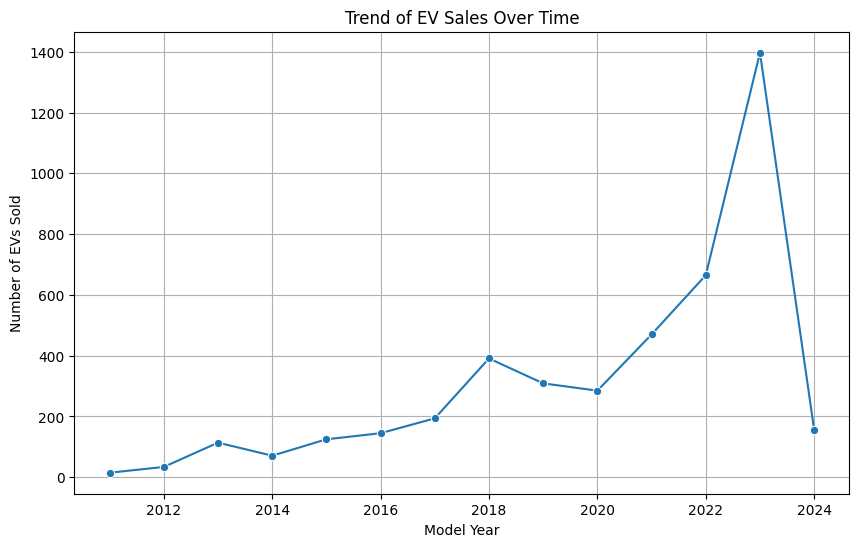

In [9]:
# Group data by Model Year and count the number of EVs
ev_sales_by_year = EV_Market_data.groupby('Model Year').size().reset_index(name='EV_Sales')

# Plot the trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model Year', y='EV_Sales', data=ev_sales_by_year, marker='o')
plt.title('Trend of EV Sales Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs Sold')
plt.grid(True)
plt.show()


# Segment the Market

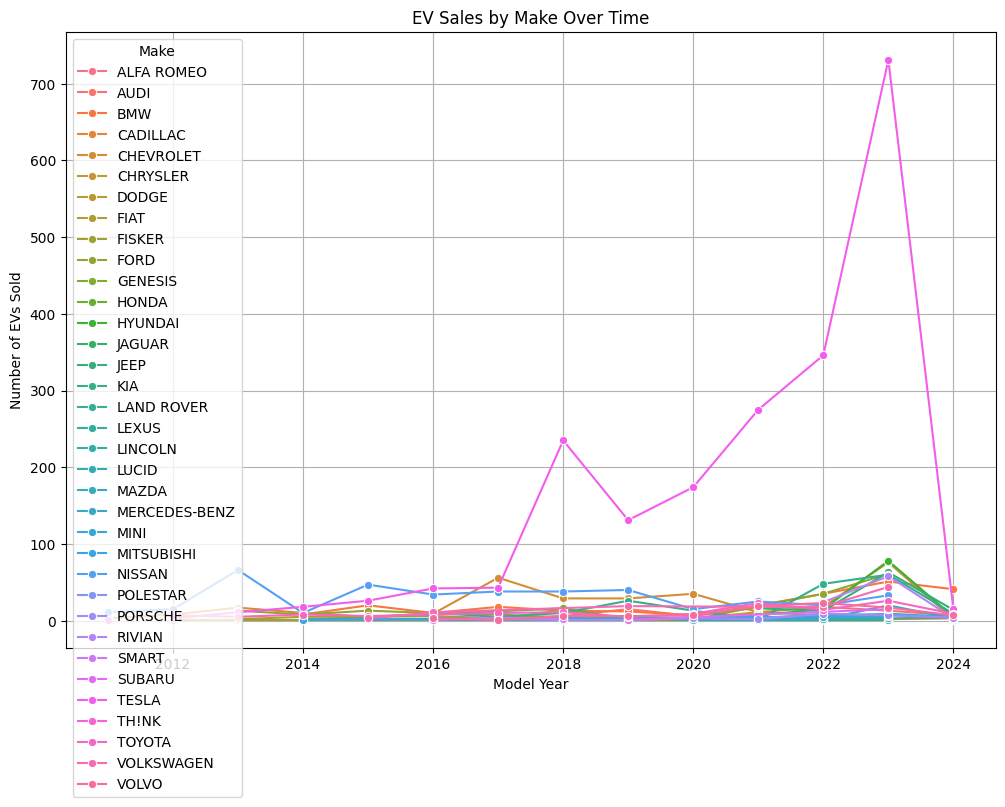

In [10]:
# Group data by Make and Model Year to analyze growth rates
ev_sales_by_make = EV_Market_data.groupby(['Make', 'Model Year']).size().reset_index(name='EV_Sales')

plt.figure(figsize=(12, 8))
sns.lineplot(x='Model Year', y='EV_Sales', hue='Make', data=ev_sales_by_make, marker='o')
plt.title('EV Sales by Make Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs Sold')
plt.grid(True)
plt.legend(title='Make')
plt.show()

## Market Size and Growth Rate Calculation

In [11]:
# Calculate annual growth rates for EV sales
ev_sales_by_make['Growth_Rate'] = ev_sales_by_make.groupby('Make')['EV_Sales'].pct_change() * 100

# Display the DataFrame with growth rates
print(ev_sales_by_make[['Model Year', 'Make', 'EV_Sales', 'Growth_Rate']])


     Model Year        Make  EV_Sales  Growth_Rate
0          2024  ALFA ROMEO         1          NaN
1          2016        AUDI         5          NaN
2          2017        AUDI         3   -40.000000
3          2018        AUDI         6   100.000000
4          2019        AUDI        15   150.000000
..          ...         ...       ...          ...
191        2020       VOLVO         7    16.666667
192        2021       VOLVO        19   171.428571
193        2022       VOLVO        23    21.052632
194        2023       VOLVO        17   -26.086957
195        2024       VOLVO         7   -58.823529

[196 rows x 4 columns]


# Visualization

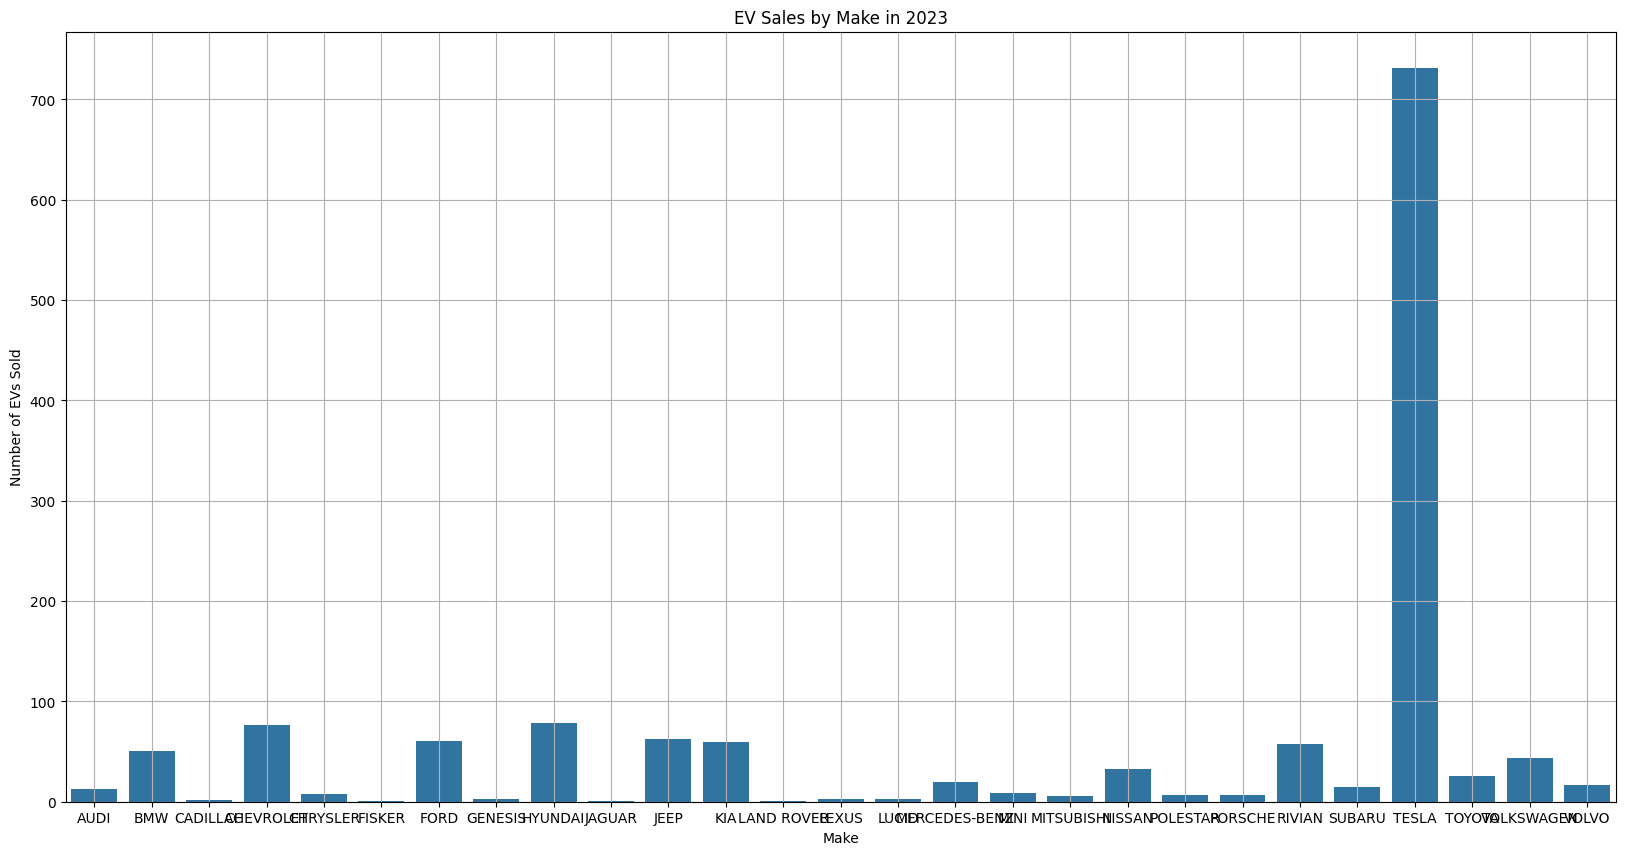

In [12]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Make', y='EV_Sales', data=ev_sales_by_make[ev_sales_by_make['Model Year'] == 2023])  # Use the correct DataFrame 'ev_sales_by_make'
plt.title('EV Sales by Make in 2023')
plt.xlabel('Make')
plt.ylabel('Number of EVs Sold')
plt.grid(True)
plt.show()